# Generatore Monte Carlo di raggi cosmici

La distribuzione angolare dei raggi cosmici che raggiungono il suolo terresrre segue approssimativamente la legge $\mathrm{d}P(\theta,\phi)/\mathrm{d}\Omega = k \cos^2\theta$ con $0\leq\theta<\pi/2$.

Il punto di impatto al suolo è uniformemente distribuito sulla superficie.

* Scrivere un generatore di raggi cosmici distribuiti secondo questo modello.
* Graficarne la distribuzione del punto di impatto e della direzione di provenienza.
* Graficare un numero finito con l'utility di matplotlib [quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html), che è pensata per visualizzare un campo vettoriale, ma noi la useremo in modo diverso

Opzionale:

* Definire la geometria di un semplice telescopio, ad es.: fatto da due piani quadrati orizzontali posti ad una certa altezza tra di loro
* Calcolare le intersezioni con i due piani di rivelatore dei raggi cosmici generati aventi punto di impatto sul piano di base
* Calcolare l'accettanza geometrica del telescopio rispetto ai raggi cosmici che arrivano al rivelatore di base

La distribuzione cumulativa di $f(\theta)$ è:

$\displaystyle F(\theta) = c_1 \int_{0}^\theta \sin \theta^\prime\cos^2\theta^\prime\,\mathrm{d}\theta^\prime = 
-\frac{c_1}{3}\left[\cos^3\theta^\prime\right]_{\theta^\prime=0}^{\theta^\prime=\theta} = 
\frac{c_1}{3}(1 - \cos^3\theta)$

Il coefficiente di normalizzazionre $c_1$ va posto in modo che sia $F(\pi/2) = 1$:

$\displaystyle 1 = \frac{c_1}{3}\left(1 - \cos^3 \frac{\pi}{2}\right) = \frac{c_1}{3}$

Quindi $c_1 = 3$ e $F(\theta) = 1 - \cos^3\theta$.

$F(\theta)$ va invertita per otterenere $\theta$ dall'equazione: $F(\theta)= r_1$, dove $r_1$ è un numero uniormemente distribuito in $[0,1\,[$:


$\displaystyle 1 - \cos^3\theta = r_1$

Da cui:


$\displaystyle\theta = \mathrm{arccos}(\sqrt[3]{1-r_1})\in \left[0, \frac{\pi}{2}\right[$


L'angolo $\phi$, come di consueto, si può generare unifrmemente tra $0$ e $2\pi$ a partire da un numero $r_2$ distribuito uniformemente in $[0,1\,[$:
$\phi = 2\pi r_2\in [0, 2\pi\,[$

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [19]:
def cosm_dir(size=1):
    return np.arccos((1 - np.random.random(size))**(1/3)), 2*math.pi*np.random.random(size)

In [89]:
n = 5000000
th, ph = cosm_dir(n)
st, ct = np.sin(th), np.cos(th)
sp, cp = np.sin(ph), np.cos(ph)
us, vs, ws = st*cp, st*sp, ct

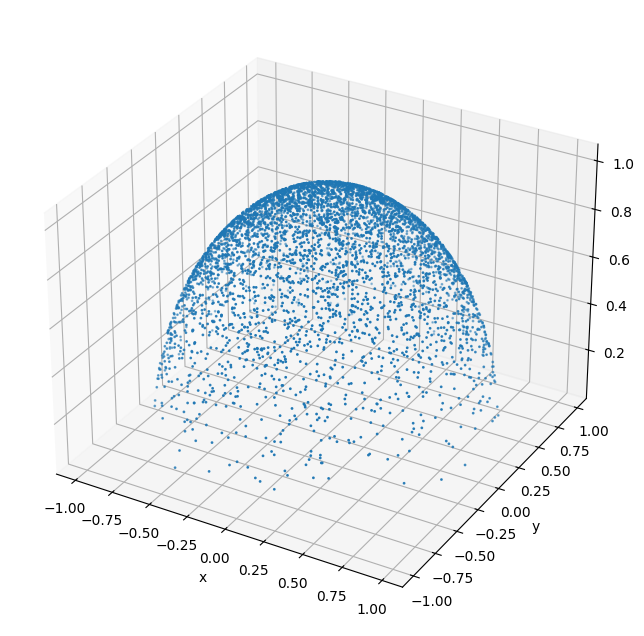

In [90]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
nmax = 5000
ax.scatter(us[:nmax], vs[:nmax], ws[:nmax], marker='o', s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.show()

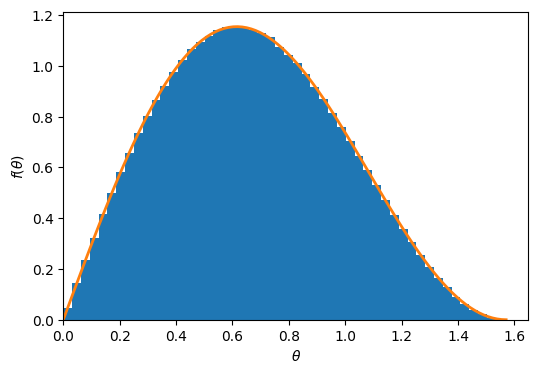

In [91]:
plt.figure(figsize = (6, 4), dpi = 100)
plt.hist(th, density=True, bins = 50)
xpts = np.linspace(0, math.pi/2, 100)
ypts = 3*np.sin(xpts)*np.cos(xpts)**2
plt.plot(xpts, ypts, linewidth=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.xlim(0)
plt.show()

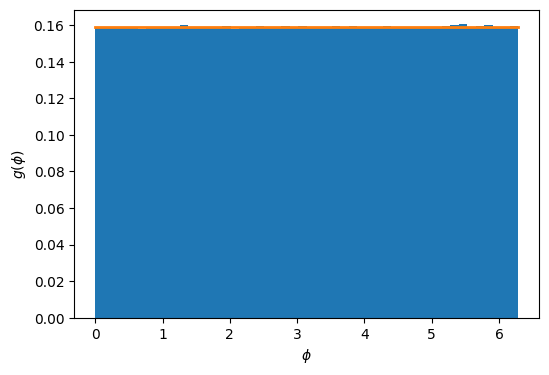

In [92]:
plt.figure(figsize=(6, 4), dpi=100)
plt.hist(ph, density=True, bins=50)
xpts = np.linspace(0, 2*math.pi, 100)
ypts = [0.5/math.pi]*len(xpts)
plt.plot(xpts, ypts, linewidth=2)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$g(\phi)$')
plt.show()